<a href="https://colab.research.google.com/github/Siddharth1698/New-York-City-Airbnb-Data-Case-Study/blob/main/New_York_City_AirBnb_Open_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATION OF DATA SCIENCE CASE STUDY



#### Case Study Presented by - SIDDHARTH M (CB.EN.P2AID20037)
#### Complete Case Study files: https://github.com/Siddharth1698/New-York-City-Airbnb-Data-Case-Study 
##### Please run the notebook with 'Open in Colab' for best results.

## New York City Airbnb Open Data
### Airbnb listings and metrics in NYC, NY, USA (2019)


### Context:
This dataset describes the listing activity and metrics in NYC, NY for 2019.


## Importing libraries
Here we are importing all the libraries required for the case study.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
import array
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.pipeline import Pipeline

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Siddharth1698/New-York-City-Airbnb-Data-Case-Study/main/AB_NYC_2019.csv')

## Loading the dataset

In [14]:
df_copy = df.copy()
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Understanding the dataset

In [15]:
df.shape

(48895, 16)

In [16]:
#+--------------------------------+------------------------------------------------------+
#| 1. id                             | listing id                                           |
#+--------------------------------+------------------------------------------------------+
#| 2. name                           | name of the listing                                  |
#+--------------------------------+------------------------------------------------------+
#| 3. host_id                        | host ID                                              |
#+--------------------------------+------------------------------------------------------+
#| 4. host_name                      | name of the host                                     |
#+--------------------------------+------------------------------------------------------+
#| 5. neighbourhood_group            | location                                             |
#+--------------------------------+------------------------------------------------------+
#| 6. neighbourhood                  | area                                                 |
#+--------------------------------+------------------------------------------------------+
#| 7. latitude                       | latitude coordinates                                 |
#+--------------------------------+------------------------------------------------------+
#| 8. longitude                      | longitude                                            |
#+--------------------------------+------------------------------------------------------+
#| 9. room_type                      | listing space type                                   |
#+--------------------------------+------------------------------------------------------+
#| 10. price                          | price in dollars                                     |
#+--------------------------------+------------------------------------------------------+
#| 11. minimum_nights                 | amount of nights minimum                             |
#+--------------------------------+------------------------------------------------------+
#| 12. number_of_reviews              | number of reviews                                    |
#+--------------------------------+------------------------------------------------------+
#| 13. last_review                    | latest review                                        |
#+--------------------------------+------------------------------------------------------+
#| 14. reviews_per_month              | number of reviews per month                          |
#+--------------------------------+------------------------------------------------------+
#| 15. calculated_host_listings_count | amount of listing per host                           |
#+--------------------------------+------------------------------------------------------+
#| 16. availability_365               | number of days when listing is available for booking |
#+--------------------------------+------------------------------------------------------+

## Data Wrangling and Cleaning 

In [17]:
# Understanding types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we have almost 48.8k rows with 16 columns for each. It is composed of 3 float types, 7 int types and 6 object types.

In [18]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

So, we can see there are around 10k null values in the last_review and review_per_month columns and a very few null values in name and host_name.

In [19]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


-> From this we can see the mean price to be around 152 dollars. 

-> Average availablity of an airbnb around a year is 112 days.


In [20]:
# Insight about unique values
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

Notable that we have 5 locations in dataset and 3 room types.

In [21]:
# Making sure if any duplicatd values.
df.duplicated().sum()

0

We do not have any duplicate rows in our dataset.

## Data Analysis and Visualization

### Host ID

In [22]:
df.host_id.value_counts().iloc[:5]

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
Name: host_id, dtype: int64

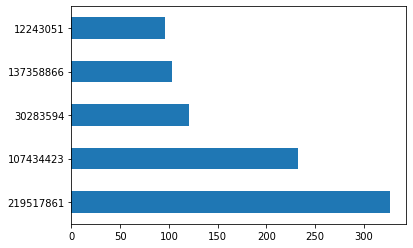

In [23]:
df.host_id.value_counts().iloc[:5].plot(kind = 'barh')

We can observe that the highest times transaction done by a customer is 327 in the year 2019.

### Room Type

In [24]:
# we noted that the room_type is only of 3 particular types.
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

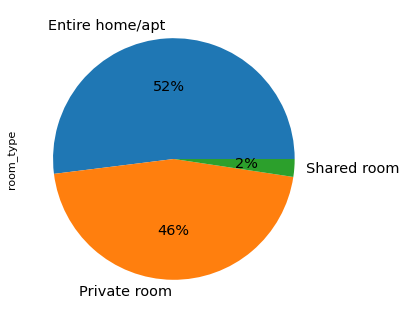

In [25]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

Intresting to note that in our dataset, around 25k people (52%) choose to use a house while 22k(46%) for a private room. Only 1k(2%) people choose a shared room. This could mean more people who use airbnb , use it with family maybe for tours,visits,etc... 

### Neighbourhood Groups - Location

In [26]:
# There are 5 particular neighbourhood_group, which means 5 unique locations.
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

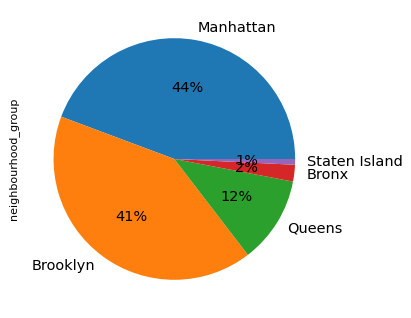

In [27]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

Manhattan is the city where most Airbnb transactions have occured with 44% of entire dataset. The least happend in Staten Island only 1%. Brooklyn consisted on 41% of transactions with 12% Queens and 2 % in Bronx.

### Neighbourhoods:

In [28]:
df['neighbourhood'].value_counts().iloc[:5]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64

In [29]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

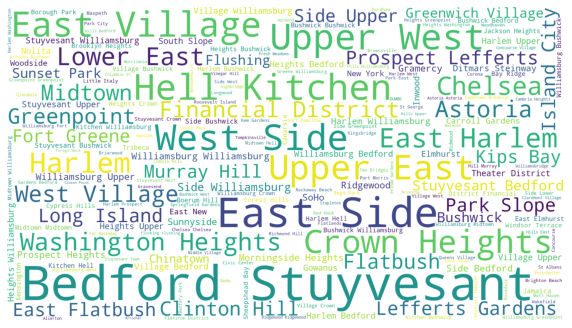

In [30]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white', width=1920,height=1080).generate(" ".join(df_copy.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

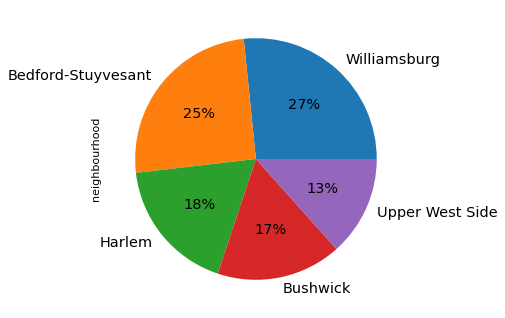

In [31]:
fig = plt.figure(figsize=(5,5), dpi=80)
df['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

We can see that Williamsburg is the hottest area of transaction followed by Bedford-Stuyvesant.

This pie-chart shows the top 5 areas by percentage in the dataset.

### Price:

In [32]:
df.price.value_counts().iloc[:10]

100    2051
150    2047
50     1534
60     1458
200    1401
75     1370
80     1272
65     1190
70     1170
120    1130
Name: price, dtype: int64

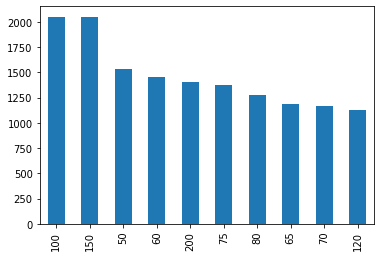

In [33]:
df.price.value_counts().iloc[:10].plot(kind = 'bar')

Almost 2k+ airbnb's has a price of 100 dollars and 150 dollars each respectively.

1.5k airbnb's have around 50 dollars price.

In [34]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64



The average pricing is around 152 dollars.

50% of data has price greater than 106 dollars.

The costliest airbnb has around 10k dollars as price.

In [35]:
df[df['price'] == 10000.000000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83




We have 3 airbnbs with 10k per night luxury stay, one private room and 2 home stay.

### Minimum Nights

In [36]:
df['minimum_nights'].value_counts()

1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64

In [37]:
for i in range(1,11):
  print("Number of nights: ",i)
  print("Amount of trasactions:",len(df[df['minimum_nights'] == i]))

Number of nights:  1
Amount of trasactions: 12720
Number of nights:  2
Amount of trasactions: 11696
Number of nights:  3
Amount of trasactions: 7999
Number of nights:  4
Amount of trasactions: 3303
Number of nights:  5
Amount of trasactions: 3034
Number of nights:  6
Amount of trasactions: 752
Number of nights:  7
Amount of trasactions: 2058
Number of nights:  8
Amount of trasactions: 130
Number of nights:  9
Amount of trasactions: 80
Number of nights:  10
Amount of trasactions: 483


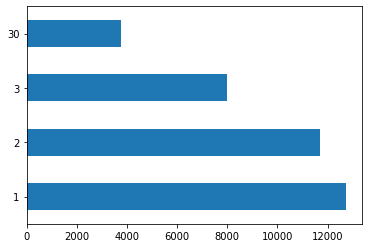

In [38]:
df['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')

We can observe that most of almost 12k people used 1 night stay in airbnb.

11k people choose 2 night stay while 7k choose 3 night stay.

Almost 3.7k stayed upto a month.

### Number of reviews

In [39]:
df['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

10k airbnbs dont have any reviews.

5.2k has around 1 review and the maximum number of reviews is 607 which only 1 airbnb has.

In [40]:
df[df['number_of_reviews'] == 607]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2031,903972,Great Bedroom in Manhattan,4734398,Jj,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293




Great Bedroom in Manhattan gets the highest reviews and it costs around 69 dollars.





 

### Availablity

In [41]:
df['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

Around 1.3k airbnbs have 365 days availablity and rest doesnt.


In [42]:
df[df['availability_365'] == 365].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.295000e+03,1.295000e+03,1295.000000,1295.000000,1295.000000,1295.00000,1295.000000,841.000000,1295.000000,1295.0
mean,1.940195e+07,8.554698e+07,40.729014,-73.943275,250.769884,19.60000,10.220849,0.832545,13.158301,365.0
std,1.197265e+07,8.786960e+07,0.057781,0.059799,550.497373,65.05093,22.095983,1.112493,36.224171,0.0
min,2.539000e+03,2.787000e+03,40.507080,-74.242850,20.000000,1.00000,0.000000,0.010000,1.000000,365.0
25%,8.725256e+06,8.931349e+06,40.687990,-73.983210,72.000000,1.00000,0.000000,0.130000,1.000000,365.0
50%,2.065068e+07,4.634351e+07,40.730990,-73.954270,125.000000,3.00000,2.000000,0.410000,2.000000,365.0
75%,3.027040e+07,1.565055e+08,40.762095,-73.921715,225.000000,30.00000,10.000000,1.000000,7.000000,365.0
max,3.648315e+07,2.733930e+08,40.893740,-73.721730,9999.000000,1250.00000,183.000000,8.940000,327.000000,365.0



Costliest airbnb with 365 days availablity costs around 10k dollars with average of 250 dollars.

### Reviews per month

In [43]:
df_copy[df_copy['reviews_per_month'] > 1].reviews_per_month.value_counts().sum()                 

15908

15.9k reviews were above 1.


In [44]:
df[df['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5]            

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

Above 1, around 406 airbnbs have 2 reviews per month, 222 with 3 and 130 with 4.



In [45]:
df['reviews_per_month'].max()

58.5

In [46]:
df_copy[df['reviews_per_month'] == 58.5]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.5,9,299




Enjoy great views in Manhattan has the highest reviews per month. They offer Private room and is worth 100 dollars a night. 



### Calculate host listing

In [47]:
df.calculated_host_listings_count.value_counts().iloc[:5]

1    32303
2     6658
3     2853
4     1440
5      845
Name: calculated_host_listings_count, dtype: int64

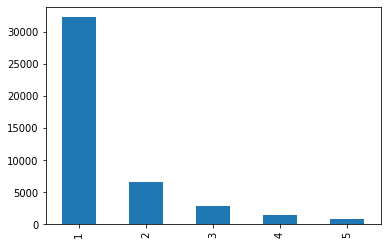

In [48]:
df.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar')

Most hosts used the listings only once that is around 32.3k and 6.6k around 2 times.


In [49]:
df.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


On an average, a host has used listings 7 times.

Maximum times being 327.

### Bivariate Analysis

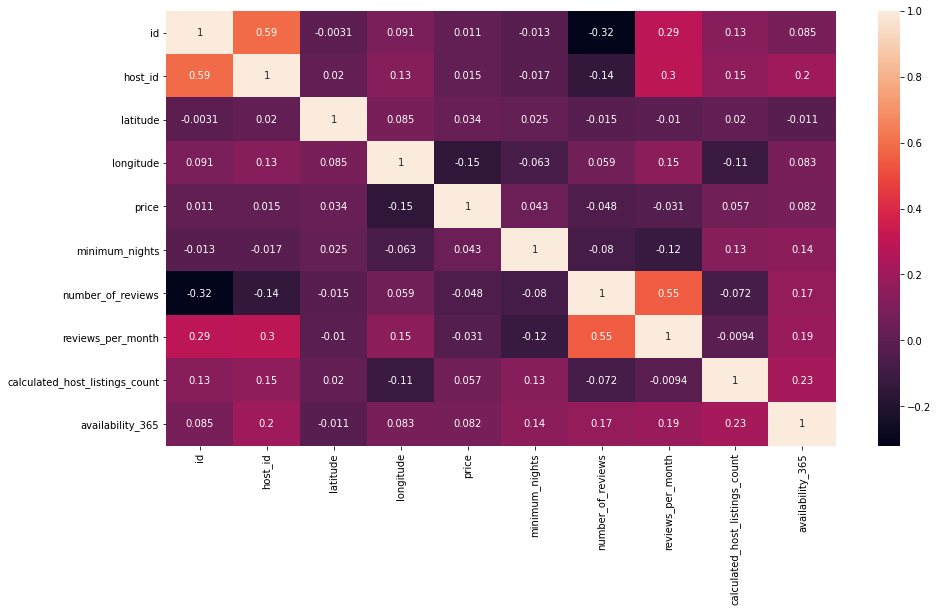

In [50]:
corr = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

### Maps - Scatterplots

#### Latitude and Longitude with loaction

In [51]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



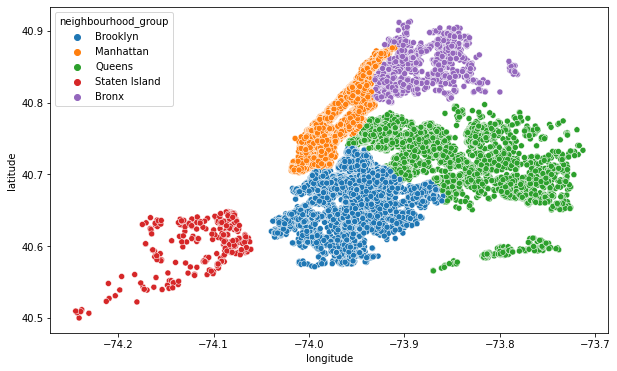

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)

This shows us the dataset distribution in NewYork city with respect to latitude and longitude.

#### Latitude and Longitude with room type

In [53]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



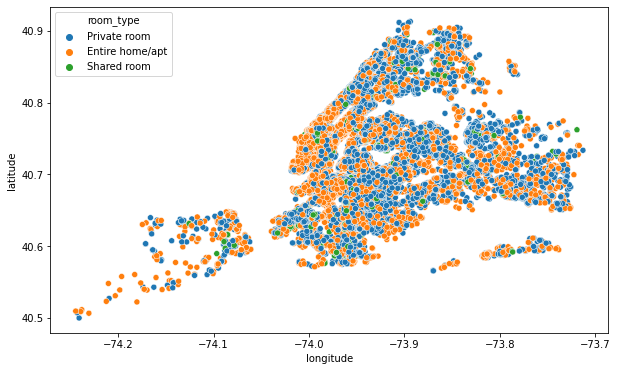

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.room_type)

#### Latitude and Longitude with room availablity for 365 days

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



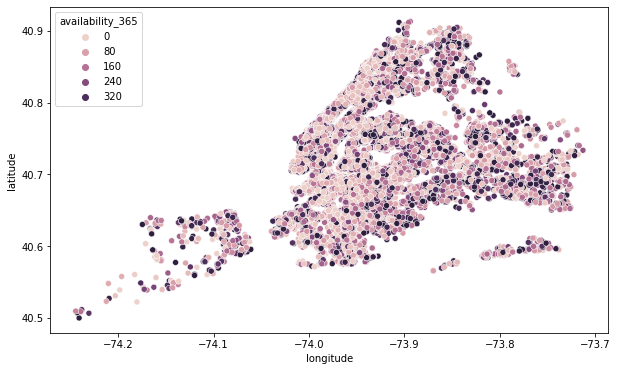

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(df_copy.longitude,df_copy.latitude,hue=df_copy.availability_365)

### Plots

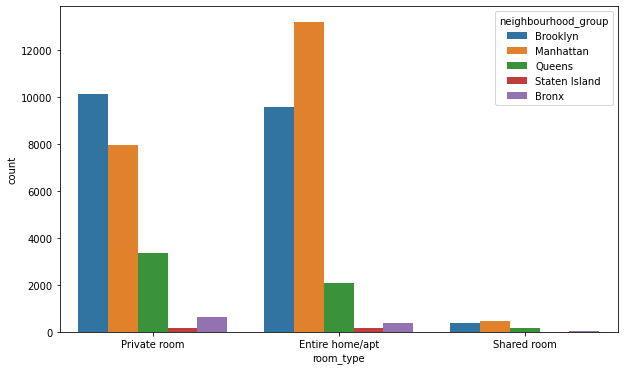

In [56]:
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'room_type', hue = 'neighbourhood_group')

Home service seems to be most used by people and the highest in Manhattan. This is also the highest service used across New York City.

In Brooklyn, Private rooms were more used.



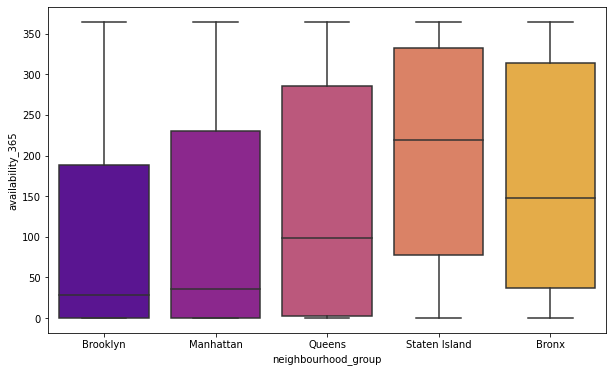

In [57]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df_copy, x='neighbourhood_group',y='availability_365',palette='plasma')

Staten Island has th highest average airbnb availablity. 

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

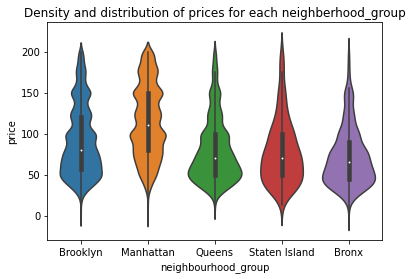

In [58]:
v2=sns.violinplot(data=df[df.price < 200], x='neighbourhood_group', y='price')
v2.set_title('Density and distribution of prices for each neighberhood_group')

Manhattan airbnb's has the highest average price.




In [59]:
df['neighbourhood'].value_counts().iloc[:10]

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

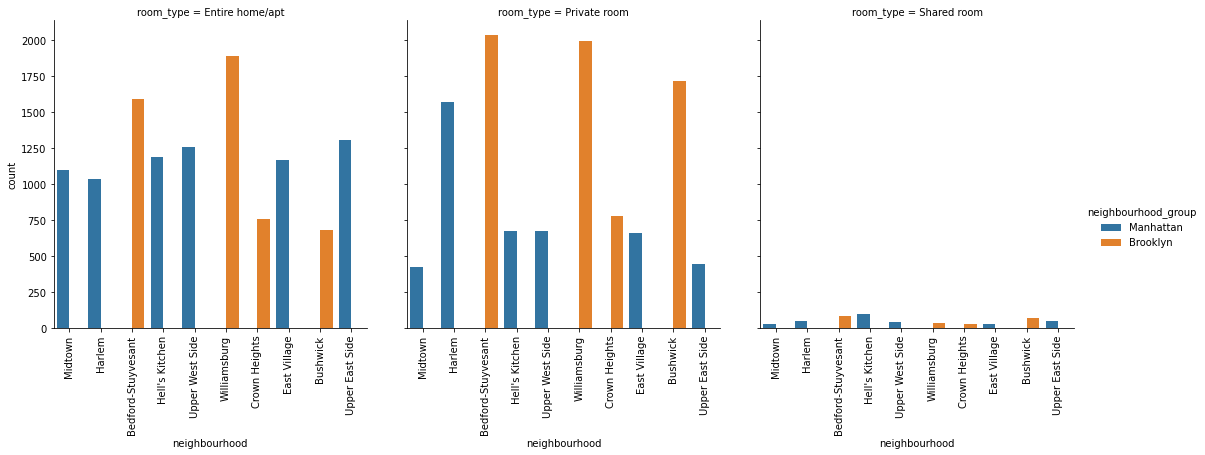

In [60]:
neighb =df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
pl =sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=neighb, kind='count')
pl.set_xticklabels(rotation=90)

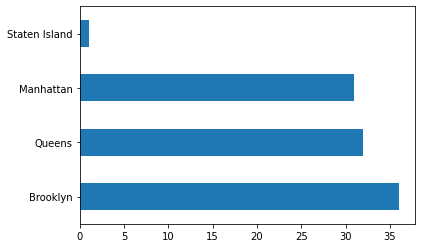

In [61]:
# Rooms with top 100 reviews by neighbourhood
dfr=df.sort_values(by=['number_of_reviews'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we look at the top 100 airbnb's with number of reviews, Brooklyn has highest reviews followed by Queens and then Manhattan.

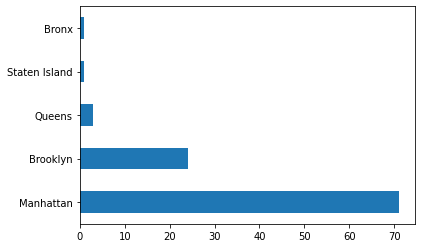

In [62]:
# Rooms with top 100 expensive by neighbourhood
dfr=df.sort_values(by=['price'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot(kind = 'barh')

If we take the top 100 airbnbs then almost 70+ comes in Manhattan, followed by 25 in Brooklyn.

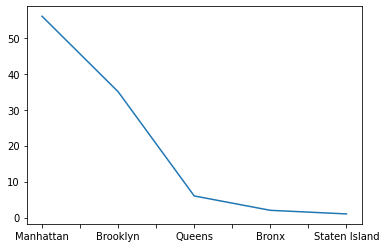

In [63]:
# Rooms with top 100 minimum_nights  by neighbourhood
dfr=df.sort_values(by=['minimum_nights'],ascending=False).head(100)
dfr['neighbourhood_group'].value_counts().plot()

Manhattan has highest airbnbs with highest minimum nights.

Text(0.5, 1.0, 'Room Type vs Price vs Neighbourhood Group')

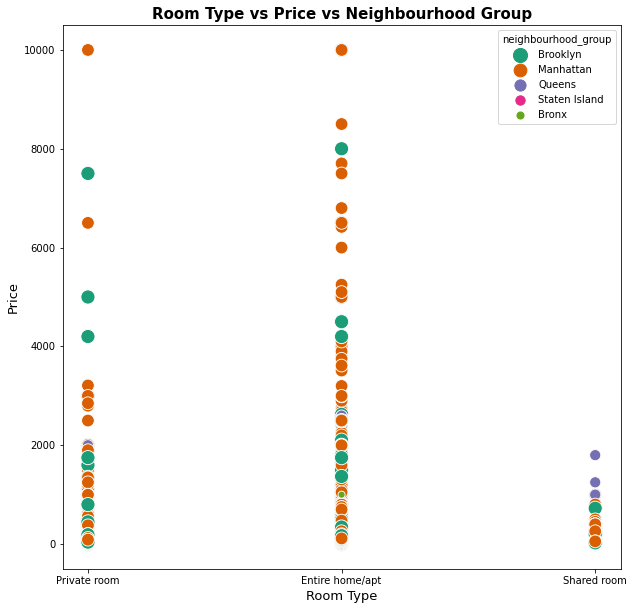

In [64]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')

### Data Cleaning

We dont require host_id,name,id,host_name and last_review as these do not any way effect for further analysis or pre-processing. So we can drop them.

In [65]:
## We can remove the unwanted columns. Here id,name , host_name and last_review doesnt help us in anyway in our approch for data analysis.
df.drop(['host_id','name','latitude','longitude','id','host_name','last_review'], axis=1, inplace=True)
df.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,0.10,1,0


Since we removed 4 columns from the dataframe, we now have to deal with 12 columns.

In [66]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [67]:
df['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

We can actually fill all the rows of column of reviews_per_month as 0 where its null value, this is because the data is null only because no one has reviewd it and hence the number of review is 0 here.

In [68]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
# Missing value implies there are no reviews for the location.

In [69]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In the availablity_365 , if we have 365 days availablity then we can directly assgn them as 365 itself and 0 for rest because they isnt availavle for 365 days.

## Hypothesis Testing

Here we have taken a dataset where we have room types as homes and non-homes and their total availablity.

In [106]:
df_copy.loc[df_copy['room_type'] == 'Entire home/apt', 'home'] = True
df_copy.loc[df_copy['room_type'] != 'Entire home/apt', 'home'] = False


In [107]:
df_hyp = df_copy[['home','availability_365']]
df_hyp.head()

,home,availability_365
0,False,365
1,True,355
2,False,365
3,True,194
4,True,0


In [108]:
df_hyp.groupby('home').count()

,availability_365
home,
False,23486
True,25409


We can find that almost 23k airbnb's are non-homes that is a private room or shared room while 25k of them are homes.

In [109]:
home = df_hyp['availability_365'][df_hyp['home']==True]
non_home = df_hyp['availability_365'][df_hyp['home']==False]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f97100b1470>,
      dtype=object)

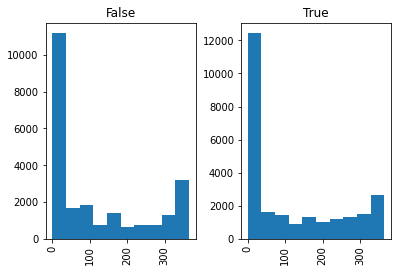

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
df_hyp.hist(by ='home')

Following is the hist representation of both homes and non-homes.

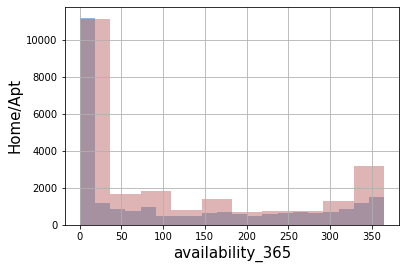

In [111]:
import seaborn as sns
home.hist(histtype='stepfilled', alpha=.5, bins=20)     # default number of bins = 10
non_home.hist(histtype='stepfilled', alpha=.5,color=sns.desaturate("indianred", 0.75 ), bins=10)
plt.xlabel('availability_365',fontsize=15)
plt.ylabel('Home/Apt',fontsize=15)
plt.show()


On an average the non-homes were more as compared to that of homes data.

#### Hypothesis:

Null hypothsis : Availablity has no influence over airbnb being home or non-home.

Alternate : Availablity has an influence over airbnb being home or non-home.

#### Test Statics
Using the mean availablity difference of homes and non-homes.

In [112]:
means_table =df_hyp.groupby('home').mean()
means_table

,availability_365
home,
False,113.712850
True,111.920304


On an average non homes availablity is more in a year than homes.

In [113]:
observatied_diff = means_table['availability_365'][1] - means_table['availability_365'][0]
observatied_diff

-1.7925463792831238

#### Predicting the Statistic under null hypothesis
Simulating the null hypothesis under permuation 


In [114]:
shuffled = df_hyp.sample(len(df_hyp),replace = False)
shuffled

,home,availability_365
3247,True,165
2312,False,190
12489,False,0
23056,False,73
46333,True,32
...,...,...
23334,False,0
41638,True,76
41492,True,73
9463,False,258


In [115]:
shuffled_availablity = shuffled['availability_365']
type(shuffled_availablity)

pandas.core.series.Series

In [116]:
orig_and_shuff = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
orig_and_shuff

,home,availability_365,shuffled_availablity
0,False,365,165
1,True,355,190
2,False,365,0
3,True,194,73
4,True,0,32
...,...,...,...
48890,False,9,0
48891,False,36,76
48892,True,27,73
48893,False,2,258


In [117]:
all_group_means = orig_and_shuff.groupby('home').mean()
all_group_means

,availability_365,shuffled_availablity
home,,
False,113.712850,112.120838
True,111.920304,113.391830


In [118]:
difference = all_group_means['shuffled_availablity'][0]- all_group_means['shuffled_availablity'][1]
difference

-1.270991720643167

In [119]:
observatied_diff

-1.7925463792831238

#### One simulation

In [120]:
shuffled = df_hyp.sample(len(df_hyp),replace = False)
shuffled_availablity = shuffled['availability_365']
orig_and_shuff = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
all_group_means = orig_and_shuff.groupby('home').mean()
differences = abs(all_group_means['shuffled_availablity'][0] - all_group_means['shuffled_availablity'][1])

In [121]:
differences

0.5805684286516879

#### Permutation test
Simulating for many times and collecting the differences in an array

In [122]:


differences = np.zeros(5000)

In [123]:
for i in range(5000):
    shuffled = df_hyp.sample(len(df_hyp),replace = False)
    shuffled_availablity = shuffled['availability_365']
    orig_and_shuffled = df_hyp.assign(shuffled_availablity = shuffled_availablity.values)
    all_group_means = orig_and_shuffled.groupby('home').mean()
    difference = (all_group_means['shuffled_availablity'][0] - all_group_means['shuffled_availablity'][1])
    differences[i] = difference


In [124]:
differnces_df = pd.DataFrame(differences)
differnces_df

,0
0,-0.393143
1,-0.267456
2,0.796958
3,-0.477618
4,-0.787167
...,...
4995,-0.986760
4996,1.519868
4997,-1.718109
4998,1.126417


In [125]:
import matplotlib
%matplotlib inline
plt.style.use('fivethirtyeight')

-1.7925463792831238


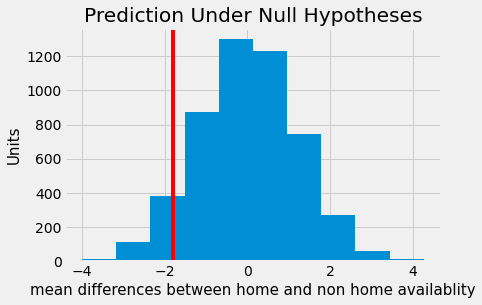

In [126]:
differnces_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('mean differences between home and non home availablity',fontsize=15)
plt.ylabel('Units',fontsize=15);
plt.axvline(observatied_diff, color='red');
print(observatied_diff)

In [127]:
np.count_nonzero(differences <= observatied_diff)/differences.size

0.0664

The empirical P-value is nearly 0, meaning that none of the 5,000 observed samples resulted in a difference of -1.79 or lower. This is an approximation; the exact chance of getting a difference in that range is not 0 but it is vanishingly small. 
#### Therefore, we reject the null hypothesis and go for alternate hypothesis. Therefore, Availablity do have an influence on airbnb being home or non-home.

## T-Test (Students T-Test)

Here, i performed t-test to check wheather the availablity of airbnb when taken a sample would change majorly with that of the overall average avaialblity of all airbnbs for airbnb's which are available for atleast more than a month.

Null hypothsis : Average availablity of Airbnbs would be same even if we take a sample of availablity data.

Alternate : Average availablity of Airbnbs would be different if we take a sample of availablity data.

In [128]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 8,8
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [129]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    ax.set_xlim([30, 365])
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=3)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

A function to carry out plotting for distributions.

In [130]:
df_copy.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'home'],
      dtype='object')

We are intrested to get the data of airbnb's available over a month.

In [131]:
df_hyp = df_copy[['neighbourhood_group','availability_365']]
df_hyp = df_hyp[df_hyp['availability_365'] > 30]
df_hyp.head()

,neighbourhood_group,availability_365
0,Brooklyn,365
1,Manhattan,355
2,Manhattan,365
3,Brooklyn,194
5,Manhattan,129


We can visualize the distribution with its mean value for entire dataframe.

<function matplotlib.pyplot.figure>

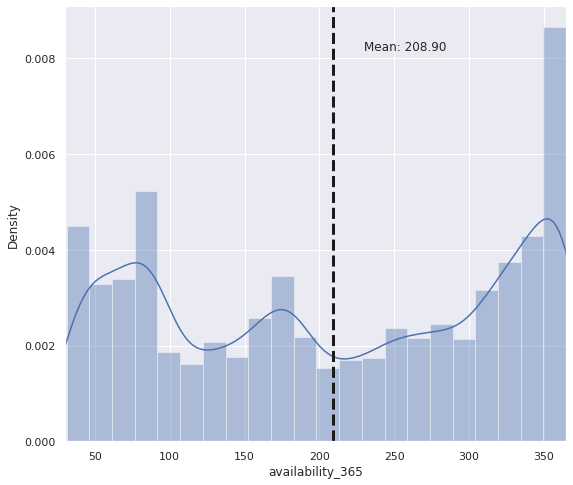

In [132]:
plot_distribution(df_hyp['availability_365'])

I have taken a large sample of data as my data is not normal taking small sample size for t-test would be invalid.

In [133]:
sample_size = 2000
avail_sample=np.random.choice(df_hyp['availability_365'],sample_size)
avail_sample

array([342, 127,  85, ...,  91,  39, 297])

In [134]:
np.mean(avail_sample)

210.0335

We can visualize the distribution with its mean value for sample dataframe.

<function matplotlib.pyplot.figure>

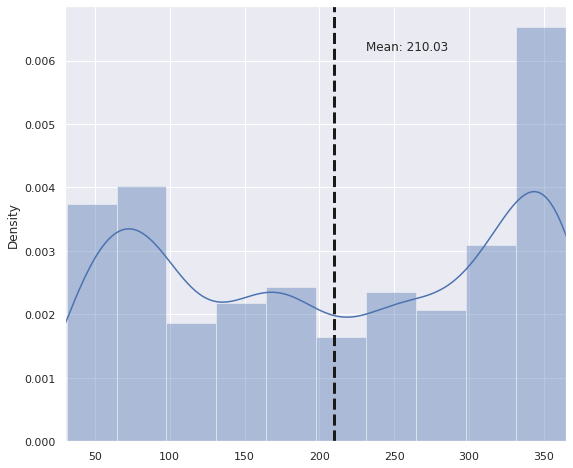

In [135]:
plot_distribution(avail_sample)

Now we can take both homes and non-homes and plot and overlay to get the mean of each on graph.

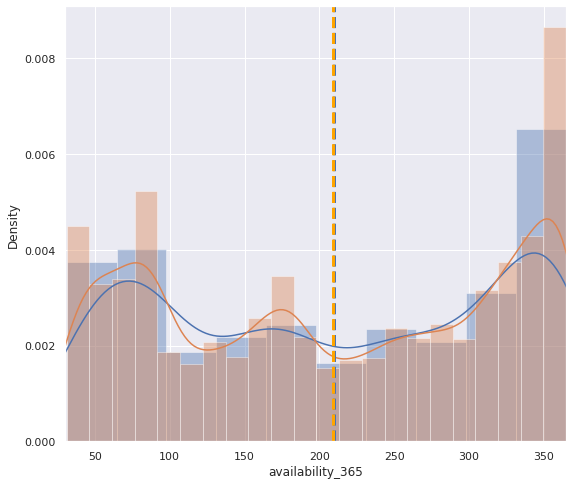

In [136]:
plt.figure()
ax1 = sns.distplot(avail_sample)
ax2 = sns.distplot(df_hyp['availability_365'])
ax1.set_xlim([30, 365])
ax2.set_xlim([30, 365])
plt.axvline(np.mean(avail_sample), color='b', linestyle='dashed', linewidth=3)
plt.axvline(np.mean(df_hyp['availability_365']), color='orange', linestyle='dashed', linewidth=3)

I have use Scipy library to import ttest_ind which helps us to carry out the t-test and give us the p-value.

In [137]:
def compare_2_groups(arr_1, arr_2, alpha):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions hence we fail to reject H0(Null Hypothesis)')
    else:
        print('Different distributions hence we reject H0(Null Hypothesis)')

compare_2_groups(df_hyp['availability_365'], avail_sample, 0.05)

Statistics=-0.436, p=0.663
Same distributions hence we fail to reject H0(Null Hypothesis)


#### Here we fail to reject H0 and hence we accept the null hypothesis itself that the average availablity of Airbnbs would be same even if we take a sample of availablity data.

## Encoding Data and Outlier removal.

We can first see the box plot of the price and find some outliers and remove them so that we can do better in further steps.

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/Siddharth1698/New-York-City-Airbnb-Data-Case-Study/main/AB_NYC_2019.csv')

fig = px.box(df, y="price")
fig.update_layout(
    autosize=False,
    width=500,
    height=400
)
fig.show()

Here, we can see that there are a lot of outliers taking up the data, it could be expensive Airbnbs, but there are a very few of them compared to data and it overall has a huge impact and must be removed.

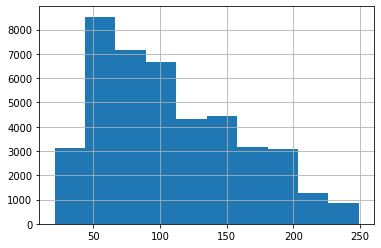

In [71]:
dfp = df["price"][df["price"] < 250]
dfp[dfp > 20].hist()


After experimenting around values the range of (20,250) has a good gaussian wise distribution and hence we can go ahead with data in this range and remove others as outliers.

In [72]:
df=df[df["price"]<250]
df=df[df["price"]>20]
df['room_type'].value_counts()

Private room       21722
Entire home/apt    19770
Shared room         1090
Name: room_type, dtype: int64

In [73]:
fig = px.box(df, y="price")
fig

This is the final price data on which we are performing the rest of operations.

In [74]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.drop(['id','host_id','latitude','longitude','host_name','last_review','name'], axis = 1,inplace=True)
df = pd.get_dummies(df, columns=['neighbourhood_group',"room_type"], prefix = ['ng',"rt"],drop_first=True)
df.drop(["neighbourhood"], axis=1, inplace=True)
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,149,1,9,0.21,6,365,1,0,0,0,1,0
1,225,1,45,0.38,2,355,0,1,0,0,0,0
2,150,3,0,0.00,1,365,0,1,0,0,1,0
3,89,1,270,4.64,1,194,1,0,0,0,0,0
4,80,10,9,0.10,1,0,0,1,0,0,0,0


We performed an Encoding on neighbourhood and room type and removed some unwanted columns.

## Linear Regression

In [75]:
def linear(x,z):
  global X,y,predictions,residue
  X = df_reg[x].values.reshape(-1,1)
  y = df_reg[z].values.reshape(-1,1)
  

  #3 Feature Scaling
  from sklearn.preprocessing import StandardScaler
  sc_X = StandardScaler()
  sc_y = StandardScaler()

  X = sc_X.fit_transform(X)
  y = sc_X.fit_transform(y)

  from sklearn.linear_model import LinearRegression
  reg = LinearRegression()
  reg.fit(X, y)

  print("The linear model is: Y = {:.2} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

  print("Regression Intercept : ",reg.intercept_[0])


  predictions = reg.predict(X)
  rms = mean_squared_error(y, predictions, squared=False)

  fig = px.scatter(
    df_reg, x=x, y=z, opacity=0.65,
    trendline='ols', trendline_color_override='darkblue')
  fig.show()

  # Plot the residuals after fitting a linear model
  sns.residplot(x=X, y=y, lowess=True, color="g")

  print("RMSE is: ", rms)
  x2 = sm.add_constant(X)

  est = sm.OLS(y, x2)
  #OLS is Ordinary Least Squares

  #est.TAB
  est2 = est.fit()
  print(est2.summary())

  residue = y - predictions

I defined a function here that will help us automatically do the regression and show the plot and OLS results.

Here i got intrested to know how the regresion line performs as early during wrangling i found number of reviews and reviews per month to be correlated with an coeffecient of 0.5. I have specfically taken a range of data for my regression purpose for better visualization. That is num of reviews less than 400 and reviews per month less than 15.

In [76]:
df_reg = df[['number_of_reviews','reviews_per_month']]
df_reg = df_reg[df_reg['number_of_reviews']<400]
df_reg = df_reg[df_reg['reviews_per_month']<15]
df_reg

,number_of_reviews,reviews_per_month
0,9,0.21
1,45,0.38
2,0,0.00
3,270,4.64
4,9,0.10
...,...,...
48890,0,0.00
48891,0,0.00
48892,0,0.00
48893,0,0.00


Here we are plotting thr linear model for this simple linear regression. We can analyze the model and get the regression Intercept.

Also i have plotted the residue plot at the end so that we can see how the difference between actual value and prediction is.

The linear model is: Y = 1.1e-16 + 0.6X
Regression Intercept :  1.1487249339260773e-16


RMSE is:  0.8007634689812883
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                 2.380e+04
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:21:32   Log-Likelihood:                -50905.
No. Observations:               42536   AIC:                         1.018e+05
Df Residuals:                   42534   BIC:                         1.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.545e-16  

,number_of_reviews,reviews_per_month,Predictions,Residue
0,9.0,0.21,-0.204685,-0.370260
1,45.0,0.38,0.285444,-0.751599
2,0.0,0.00,-0.327217,-0.382115
3,270.0,4.64,3.348749,-1.088766
4,9.0,0.10,-0.204685,-0.440653


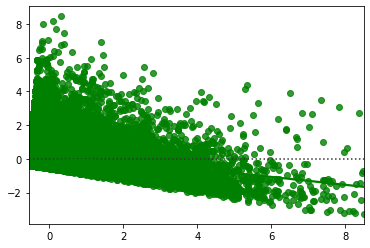

In [77]:
linear('number_of_reviews','reviews_per_month')
df_n = pd.DataFrame(predictions, columns = ['Predictions'])
df_reg_new = pd.concat([df_reg,df_n],axis = 1)
df_n = pd.DataFrame(residue, columns = ['Residue'])
df_reg_new = pd.concat([df_reg_new,df_n],axis = 1)
df_reg_new[['number_of_reviews','reviews_per_month','Predictions','Residue']].head()

We can from here interpret the fact that R2 is almost 0.35 which means the model is considered weak in nature and not particularly weak. We have also got our RMSE around 0.8 which is fine to an extent.

## Multiple Linear Regression

Here we are intrested to predict the prices of Airbnb's with help of all other variables assosiated with it.

In [78]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Private room,rt_Shared room
0,149,1,9,0.21,6,365,1,0,0,0,1,0
1,225,1,45,0.38,2,355,0,1,0,0,0,0
2,150,3,0,0.00,1,365,0,1,0,0,1,0
3,89,1,270,4.64,1,194,1,0,0,0,0,0
4,80,10,9,0.10,1,0,0,1,0,0,0,0


In [79]:
df.shape

(42582, 12)

I am taking the price as 'y' and the rest of columns as 'X'. Here we can see that the data are all of different scales and hence we use the help of StandardScaler to scale them and we can procced with out splitting.

In [80]:
X = df.drop(['price'],axis=1)
y = df['price'].values.reshape(-1,1)


sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_X.fit_transform(y)


I used 30% of the data for testing and fitting it to the linear model which we generated using the rest off the data.

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(29807, 11)
(29807, 1)
(12775, 11)
(12775, 1)


This is our linear model and we can see the intercept and coefficents at the end.

In [83]:



# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print("intercept is: ",linreg.intercept_)

print("coefficients are: ",linreg.coef_)

intercept is:  [-0.00065527]
coefficients are:  [[-0.06012777 -0.00322637 -0.02921139  0.05312798  0.09180824  0.15880011
   0.37331764  0.04477949 -0.00667876 -0.60179669 -0.25548752]]


In [84]:
y_pred = linreg.predict(X_test)

In [85]:

print("R-Square Value",r2_score(y_test,y_pred))
print("\n")
print ("mean_absolute_error :",metrics.mean_absolute_error(y_test, y_pred))
print("\n")
print ("mean_squared_error : ",metrics.mean_squared_error(y_test, y_pred))
print("\n")
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R-Square Value 0.49825062463278336


mean_absolute_error : 0.5447704306017557


mean_squared_error :  0.49796014632817437


root_mean_squared_error :  0.7056629126772742


We can from here interpret the fact that R2 is almost 0.5 which means the model is moderate in nature and not particularly weak. We have also got our RMSE around 0.7 which is fine.

Next, we go for a 10 fold cross validation on our Linear model.

In [86]:

my_pipeline = Pipeline(steps=[('model', LinearRegression())])

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* scores
scores1 =  1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='r2')
scores2 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')
scores3 = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_root_mean_squared_error')

print("R squared scores:\n", scores1)
print("Average R squared score (across experiments):",scores1.mean())


print("RMSE scores:\n", scores3)
print("Average RMSE score (across experiments):",scores3.mean())

R squared scores:
 [0.40285593 0.43615142 0.4762851  0.51862289 0.46868858 0.4777346
 0.4933936  0.47629253 0.54692744 0.53290862]
Average R squared score (across experiments): 0.4829860705352534
RMSE scores:
 [0.75009141 0.7151905  0.71130755 0.69458738 0.70942643 0.69992466
 0.69973819 0.71329621 0.72334227 0.72276634]
Average RMSE score (across experiments): 0.7139670947693814


We can see that the average R square came around 0.48 and RMSE around 0.71.

In [87]:
x2 = sm.add_constant(X)
est = sm.OLS(y, x2)
#OLS is Ordinary Least Squares
#est.TAB
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     3777.
Date:                Tue, 05 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:21:33   Log-Likelihood:                -45920.
No. Observations:               42582   AIC:                         9.186e+04
Df Residuals:                   42570   BIC:                         9.197e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        5.07e-16      0.003   1.47e-13      1.0

## Classification

In [88]:
df_classif = df

In [89]:
df_classif['availability_365'] = df_classif['availability_365'].apply(lambda x: 1 if x == 365 else 0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



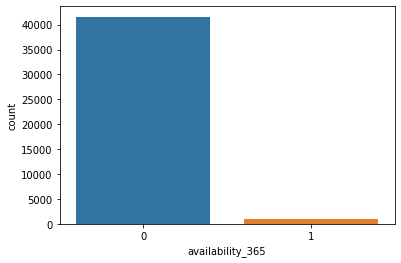

In [90]:
sns.countplot(df_classif['availability_365'])

In [91]:
X = df_classif.drop(['availability_365'],axis=1)
y = df_classif['availability_365'].values


Went for oversampling as we can see a huge imbalance in data, so we would end up with very low AUC score. Oversampling seem to work better than undersampling in this case.

In [92]:
from imblearn.over_sampling import SMOTE
import imblearn
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



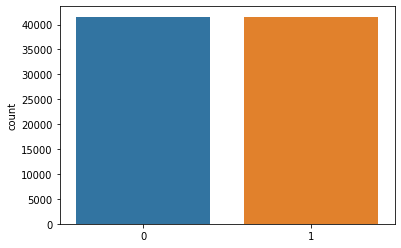

In [93]:
sns.countplot(y)

In [94]:
len(y)

83156

Defining a functiom to perform classification plotting of confusion matrix.

In [95]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
# Used for classification of dataset.
def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))

  
  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)



### Naive Bayes

In [96]:
skf = StratifiedKFold(n_splits=10 )
scores = []
rocScores = []


model = GaussianNB()
i = 0

for train_index,test_index in skf.split(X,y):
    i = i + 1

    X_train, X_test =  X[list(train_index)], X[list(test_index)]
    y_train, y_test = y[list(train_index)], y[list(test_index)]
    

    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    scores.append(score)   
    rocScore = roc_auc_score(y_test, y_pred)
    rocScores.append(rocScore)
   

mean_acc_score = np.array(scores).mean()
mean_roc_score = np.array(rocScores).mean()

print('The Accuracy scores are: \n',scores)
print('The mean accuracy score is:',mean_acc_score)

print('The ROC scores are: \n',rocScores)
print('The mean ROC score is:',mean_roc_score)

The Accuracy scores are: 
 [0.6518759018759018, 0.6642616642616642, 0.6570466570466571, 0.6513949013949014, 0.6578884078884079, 0.6581289081289081, 0.6454600120264582, 0.6240529164161155, 0.6091401082381239, 0.6144317498496693]
The mean accuracy score is: 0.6433681227126807
The ROC scores are: 
 [0.6518759018759018, 0.6642616642616642, 0.657046657046657, 0.6513949013949013, 0.6578884078884079, 0.6581289081289081, 0.6454930706193636, 0.6240842969252881, 0.6091082248768079, 0.6143983912807583]
The mean ROC score is: 0.6433680424298658


Confusion matrix:
 [[3708  450]
 [2756 1401]]


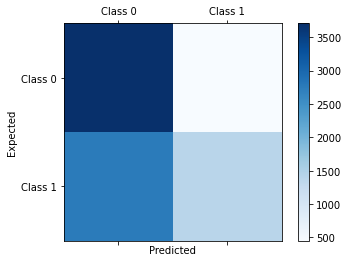

Accuracy 0.6144317498496693
              precision    recall  f1-score   support

           0       0.57      0.89      0.70      4158
           1       0.76      0.34      0.47      4157

    accuracy                           0.61      8315
   macro avg       0.67      0.61      0.58      8315
weighted avg       0.67      0.61      0.58      8315

AUC Score: 
0.6143983912807583


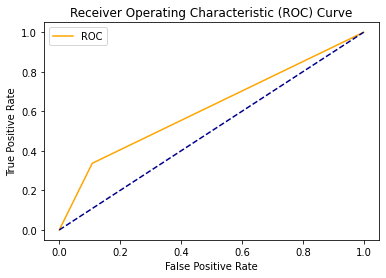

In [97]:
from sklearn.linear_model import LogisticRegression 
classifier = GaussianNB()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

#### Logistic Regression

In [98]:
skf = StratifiedKFold(n_splits=10)
scores = []
rocScores = []


model = LogisticRegression()
i = 0

for train_index,test_index in skf.split(X,y):
    i = i + 1
    X_train, X_test =  X[list(train_index)], X[list(test_index)]
    y_train, y_test = y[list(train_index)], y[list(test_index)]

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    scores.append(score)   
    rocScore = roc_auc_score(y_test, y_pred)
    rocScores.append(rocScore)


mean_acc_score = np.array(scores).mean()
mean_roc_score = np.array(rocScores).mean()



print('The Accuracy scores are: \n',scores)
print('The mean accuracy score is:',mean_acc_score)

print('The ROC scores are: \n',rocScores)
print('The mean ROC score is:',mean_roc_score)


The Accuracy scores are: 
 [0.7181337181337182, 0.7316017316017316, 0.7401394901394901, 0.7231842231842232, 0.7260702260702261, 0.7338864838864839, 0.7242333132892363, 0.695610342754059, 0.6893565844858689, 0.6782922429344558]
The mean accuracy score is: 0.7160508356479492
The ROC scores are: 
 [0.7181337181337181, 0.7316017316017317, 0.7401394901394902, 0.7231842231842232, 0.7260702260702261, 0.7338864838864838, 0.7242364768224763, 0.6956090221666358, 0.6893600946403448, 0.678298211735787]
The mean ROC score is: 0.7160519678381118


Confusion matrix:
 [[2614 1544]
 [1131 3026]]


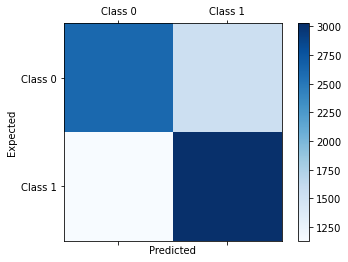

Accuracy 0.6782922429344558
              precision    recall  f1-score   support

           0       0.70      0.63      0.66      4158
           1       0.66      0.73      0.69      4157

    accuracy                           0.68      8315
   macro avg       0.68      0.68      0.68      8315
weighted avg       0.68      0.68      0.68      8315

AUC Score: 
0.678298211735787


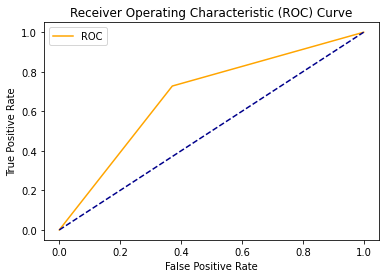

In [99]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

### KNN

In [100]:
skf = StratifiedKFold(n_splits=10)
scores = []
rocScores = []


model = KNeighborsClassifier()
i = 0

for train_index,test_index in skf.split(X,y):
    i = i + 1
    X_train, X_test =  X[list(train_index)], X[list(test_index)]
    y_train, y_test = y[list(train_index)], y[list(test_index)]

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    scores.append(score)   
    rocScore = roc_auc_score(y_test, y_pred)
    rocScores.append(rocScore)


mean_acc_score = np.array(scores).mean()
mean_roc_score = np.array(rocScores).mean()



print('The Accuracy scores are: \n',scores)
print('The mean accuracy score is:',mean_acc_score)

print('The ROC scores are: \n',rocScores)
print('The mean ROC score is:',mean_roc_score)



The Accuracy scores are: 
 [0.911976911976912, 0.955026455026455, 0.9634439634439634, 0.9456469456469456, 0.9467291967291968, 0.9421596921596922, 0.9349368610944077, 0.91665664461816, 0.9195429945880939, 0.9105231509320505]
The mean accuracy score is: 0.9346642816215877
The ROC scores are: 
 [0.911976911976912, 0.955026455026455, 0.9634439634439634, 0.9456469456469456, 0.9467291967291968, 0.9421596921596921, 0.934931494168925, 0.9166487607671153, 0.9195508182157208, 0.9105317120712839]
The mean ROC score is: 0.9346645950206209


Confusion matrix:
 [[3490  668]
 [  76 4081]]


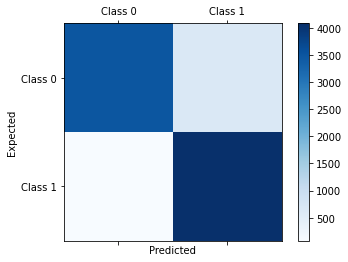

Accuracy 0.9105231509320505
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      4158
           1       0.86      0.98      0.92      4157

    accuracy                           0.91      8315
   macro avg       0.92      0.91      0.91      8315
weighted avg       0.92      0.91      0.91      8315

AUC Score: 
0.9105317120712839


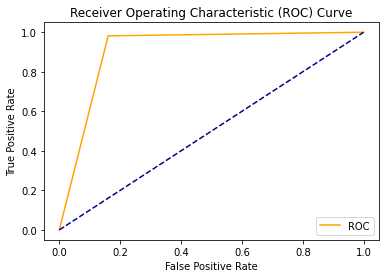

In [101]:
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

Minimum error:- 0.05772699939867709 at K = 1


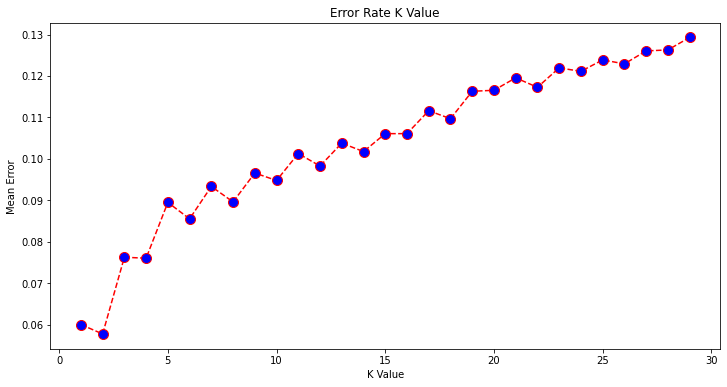

In [102]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error)))

Here, we can check on how the mean error gets varied with respect to that of the number of neighbours. We can see that the best k value that corresponds to least error rate comes initially and gradually increases across the scale. This is because we have initaially done a synthesised oversampling of data so already data points are plotted based on feature grouping and thats why wehen we run KNN we would end up with least error at first and gradually error increases on increasing n.

###  Decision tree

In [103]:
skf = StratifiedKFold(n_splits=10)
scores = []
rocScores = []

model = tree.DecisionTreeClassifier()
i = 0

for train_index,test_index in skf.split(X,y):
    i = i + 1
    X_train, X_test =  X[list(train_index)], X[list(test_index)]
    y_train, y_test = y[list(train_index)], y[list(test_index)]

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = metrics.accuracy_score(y_test,y_pred)
    scores.append(score)   
    rocScore = roc_auc_score(y_test, y_pred)
    rocScores.append(rocScore)


mean_acc_score = np.array(scores).mean()
mean_roc_score = np.array(rocScores).mean()


print('The Accuracy scores are: \n',scores)
print('The mean accuracy score is:',mean_acc_score)

print('The ROC scores are: \n',rocScores)
print('The mean ROC score is:',mean_roc_score)


The Accuracy scores are: 
 [0.8922558922558923, 0.9796777296777297, 0.9856902356902357, 0.9788359788359788, 0.9844877344877345, 0.9782347282347282, 0.9803968731208659, 0.9740228502705953, 0.9671677690920024, 0.9458809380637402]
The mean accuracy score is: 0.9666650729729502
The ROC scores are: 
 [0.8922558922558923, 0.9796777296777296, 0.9856902356902356, 0.9788359788359788, 0.9844877344877345, 0.9782347282347281, 0.9803952673810745, 0.9740203043065685, 0.9671710229203614, 0.9458865202189715]
The mean ROC score is: 0.9666655414009275


Confusion matrix:
 [[3766  392]
 [  31 4126]]


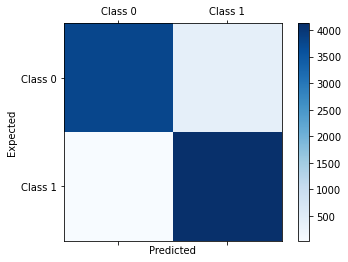

Accuracy 0.9491280817799158
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      4158
           1       0.91      0.99      0.95      4157

    accuracy                           0.95      8315
   macro avg       0.95      0.95      0.95      8315
weighted avg       0.95      0.95      0.95      8315

AUC Score: 
0.9491333023928645


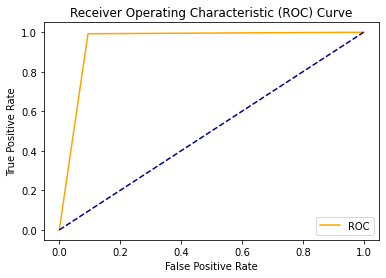

In [104]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)


classif_results()

<Figure size 432x288 with 0 Axes>

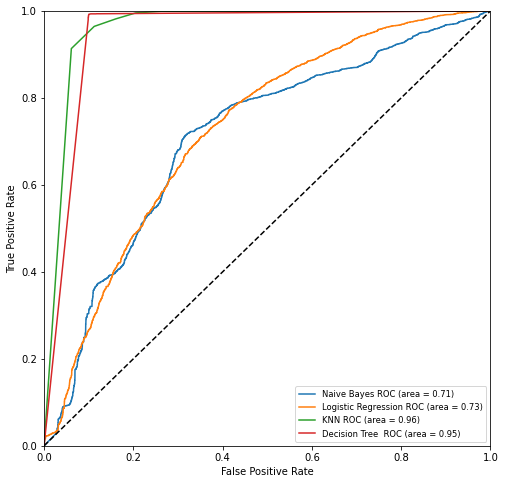

In [105]:
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()
des_model = tree.DecisionTreeClassifier()

models = [
  
    {
        'label': 'Naive Bayes',
        'model': nb_model
    },
    {
        'label': 'Logistic Regression',
        'model': lr_model
    },
      {
        'label': 'KNN',
        'model': knn_model
    },
  
    {
        'label': 'Decision Tree ',
        'model': des_model
    }
]

from sklearn.metrics import roc_curve, roc_auc_score, auc


plt.clf()
plt.figure(figsize=(8,8))
for m in models:
    m['model'].probability = True
    probas = m['model'].fit(X_train,y_train).predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

Decision Tree as well as KNN model seems to be working well for our data and has good classification ability over Naive Bayes and Logistic Regression.